# Reporte escrito 1

In [ ]:
# Instala dependencias
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/BaseReporte1.sav
!pip install pingouin
!pip install pyreadstat

En las respuestas deben indicar:

- Hipótesis de trabajo e hipótesis estadísticas, de manera correspondiente.
- Resultados de prueba de normalidad para las distribuciones de las variables de estudio.
- Indicadores estadísticos utilizados (SW, M, Mdn, DE, t, U, F, r) el valor p
correspondiente, y la magnitud según criterios de Cohen, de ser pertinente.
- Redacción de las conclusiones.

>Nota: reportar la normalidad de las distribuciones en base a la prueba Shapiro-Wilk. Para
efectos de este reporte, NO consideren asimetría y curtosis para decidir la prueba estadística a
utilizar

En una investigación sobre los recursos que facilitan la adaptación a la pandemia por COVID-19 en la adultez media (40 a 60 años) se contó con información sobre optimismo, mindfulness-rasgo y miedo al COVID-19. 

El estudio contó con la participación de 90 adultas, y adultos, quienes completaron el protocolo de estudio en línea. Además de los constructos de estudio, se recolectaron datos generales de sexo de las/los participantes, edad en años, si se encuentran en una relación de pareja, o no, y si consumen alcohol semanalmente.

In [2]:
import pandas as pd

df = pd.read_spss("BaseReporte1.sav")
df

,Código,Edad,Sexo,Pareja,Cons_alcohol,Optimismo,Mindful,Miedo_COV
0,001,53.0,Mujer,Si,Sí,47.0,37.0,55.0
1,002,49.0,Mujer,No,No,36.0,39.0,41.0
2,003,57.0,Hombre,Si,Sí,54.0,25.0,42.0
3,004,55.0,Hombre,No,No,68.0,38.0,53.0
4,005,52.0,Mujer,No,No,50.0,42.0,46.0
...,...,...,...,...,...,...,...,...
85,086,46.0,Mujer,No,No,44.0,52.0,47.0
86,087,44.0,Hombre,Si,Sí,58.0,35.0,56.0
87,088,58.0,Hombre,No,Sí,54.0,33.0,50.0
88,089,43.0,Mujer,Si,No,50.0,22.0,49.0


## Pregunta 1

El propósito de estudio planteó que el **miedo al COVID-19** se asocia tanto con el **optimismo** como con el **mindfulness rasgo** en la adultez media. Particularmente se esperaba que el miedo al COVID-19 se asocie indirectamente con el optimismo y con el mindfulness reportado por las/los adultos. Plantea, analiza y redacta las conclusiones de los resultados (12 pts).

HT1: El miedo al COVID-19 y el optimismo se asocian inversamente entre sí.
- $H_{0}$: $r_{xy}=0$,   x=optimismo, y=miedo COVID-19
- $H_{1}$: $r_{xy}<0$

HT2: El miedo al COVID-19 y el mindfulness se asocian inversamente entre sí.
- $H_{0}$: $r_{xy}=0$,    x=mindfulness, y=miedo COVID-19
- $H_{1}$: $r_{xy}<0$

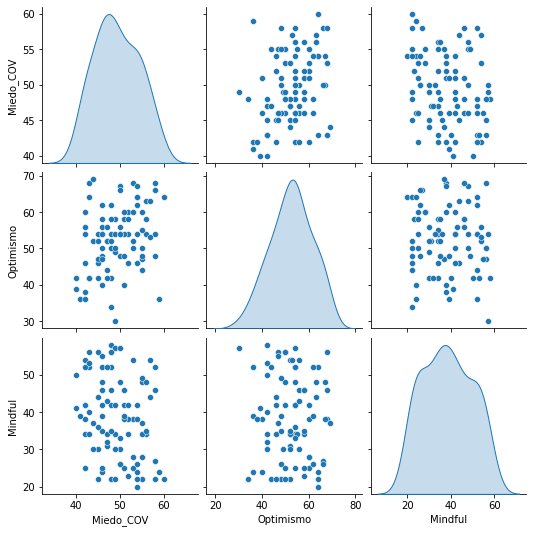

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[["Miedo_COV", "Optimismo", "Mindful"]], diag_kind="kde")
plt.show()

Primero se llevará a cabo la prueba Shapiro-Wilk para identificar normalidad de las distribuciones de los tres constructos de estudio.

- H0: La distribución es normal.
- H1: La distribución no es normal.

In [4]:
import pingouin as pg

pg.normality(data=df[["Miedo_COV", "Optimismo", "Mindful"]], method="shapiro")

,W,pval,normal
Miedo_COV,0.973302,0.060564,True
Optimismo,0.982150,0.253947,True
Mindful,0.949631,0.001588,False


Tanto optimismo (SW=.98, p=.25) como miedo al COVID-19 (SW=.97, p=.06) presentan distribuciones normales mientras que en mindfulness se observa una distribución no normal (SW=.95, p=.002). Para responder la HT1 se usará el coeficiente de correlación de Pearson (paramétrico) y para la HT2 el coeficiente Spearman (no paramétrico).

In [11]:
pg.pairwise_corr(
    columns=["Miedo_COV", "Optimismo"],
    method="pearson",
    data=df,
    alternative="greater",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Miedo_COV,Optimismo,pearson,greater,90,0.32627,"[0.16, 1.0]",0.000849,33.462,0.93717


HT1: El análisis de correlación de Pearson muestra una correlación directa entre optimismo y miedo al COVID-19 en adultas y adultos, r(88)=.33, p=.001 (unilateral). La magnitud de esta asociación es mediana según los criterios de Cohen (1988). Se puede concluir que en la muestra de estudio existe una correlación lineal positiva entre las variables, contrario a lo que se esperaba en la investigación.

In [6]:
pg.pairwise_corr(
    columns=["Miedo_COV", "Mindful"],
    method="spearman",
    data=df,
    alternative="less",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Miedo_COV,Mindful,spearman,less,90,-0.236767,"[-1.0, -0.06]",0.012326,0.732102


HT2: El análisis de correlación de Spearman muestra que hay una correlación lineal inversa entre mindfulness y miedo al COVID-19, r(88)=-.24, p=.012 (unilateral), aunque con un tamaño del efecto pequeño (Cohen, 1988). Este resultado está en consonancia con lo que se esperaba en la hipótesis de trabajo sobre la relación entre los constructos.

En conclusión, en la HT1 se identificó una correlación positiva significativa y mediana entre optimismo y miedo al COVID-19, que no era la relación que se esperaba en el estudio. Por su parte, en la HT2 se encontró sustento de la asociación significativa e inversa planteada en la investigación, aunque con una magnitud pequeña.

## Pregunta 2

Las evidencias indican que existiría una diferencia en el nivel de **optimismo** según el **sexo de las/los participantes**, con las mujeres puntuando más bajo que los hombres. Plantea y lleva a cabo los análisis estadísticos correspondientes y describe lo encontrado (5 pts).                    

HT: Hay una diferencia en el nivel de optimismo en la muestra, con las mujeres puntuando más bajo que los hombres.
- H0: $\mu_{Mujeres}  = \mu_{Hombres}$
- H1: $\mu_{Mujeres}  < \mu_{Hombres}$


In [20]:
df.groupby("Sexo").describe()["Optimismo"]

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
Hombre,41.0,54.926829,8.013708,38.0,49.0,54.0,60.0,68.0
Mujer,49.0,50.489796,9.169975,30.0,42.0,50.0,56.0,69.0


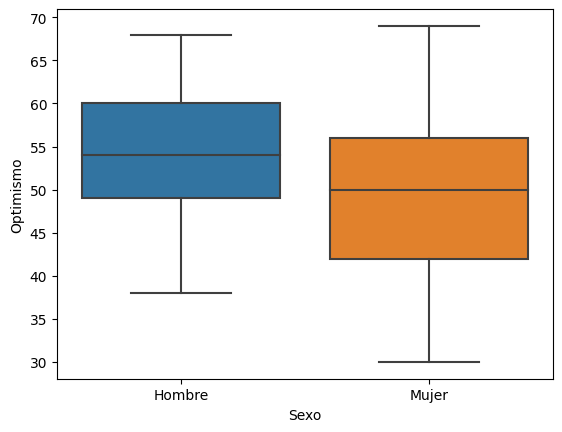

In [15]:
sns.boxplot(x="Sexo", y="Optimismo", data=df)
plt.show()

In [13]:
pg.normality(data=df, dv="Optimismo", group="Sexo", method="shapiro")

,W,pval,normal
Mujer,0.982450,0.671022,True
Hombre,0.966775,0.269433,True


Las distribuciones de optimismo en mujeres (SW=.98, p=.67) como en hombres (SW=.97, p=.27) fueron normales. Por lo tanto, se usará el análisis paramétrico de contraste de dos muestras independientes t de Student.

In [30]:
pg.homoscedasticity(data=df, dv="Optimismo", group="Sexo")

,W,pval,equal_var
levene,1.101196,0.296877,True


La prueba de Levene resultó no significativa, F=1.10, p=.30, por lo que se asumen varianzas iguales entre los grupos.

In [25]:
mujer = df.query('Sexo == "Mujer"')["Optimismo"]
hombre = df.query('Sexo == "Hombre"')["Optimismo"]


pg.ttest(mujer, hombre, alternative="less", correction="False", paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.419722,88,less,0.008795,"[-inf, -1.39]",0.51215,5.559,0.775235


El resultado del análisis de comparación fue significativo, t(88)=-2.42, p=.009 (unilateral), con las mujeres puntuando más bajo en optimismo (M=50.49, DE=9.17) que los hombres (M=54.93, DE=8.01).

En conclusión, los resultados apoyan la idea que el nivel de optimismo varía según el sexo de la, o el participante, con las mujeres puntuando más bajo que los hombres, en promedio. Así, la hipótesis de trabajo se cumple en el estudio.

## Pregunta 3

Describe la muestra de acuerdo con las variables sociodemográficas reportadas y señala el tipo de variable y los estadísticos descriptivos que mejor brinden información sobre ellas (3 pts).

In [36]:
df["Edad"].describe()

count    90.00000
mean     49.80000
std       5.91171
min      40.00000
25%      44.00000
50%      50.00000
75%      55.00000
max      60.00000
Name: Edad, dtype: float64

In [33]:
pd.crosstab(df["Sexo"], columns="Porcentaje", normalize=True)

col_0,Porcentaje
Sexo,
Hombre,0.455556
Mujer,0.544444


In [32]:
pd.crosstab(df["Pareja"], columns="Porcentaje", normalize=True)

col_0,Porcentaje
Pareja,
No,0.422222
Si,0.577778


In [31]:
pd.crosstab(df["Cons_alcohol"], columns="Porcentaje", normalize=True)

col_0,Porcentaje
Cons_alcohol,
No,0.6
Sí,0.4


- La edad es una variable continua y numérica por lo que es más adecuado considerar la media, es decir el promedio de las edades de las/los participantes. Para dispersión se consideraría la desviación estándar y los valores mínimo y máximo (rango).

- El sexo es una variable cualitativa y nominal por lo que resulta adecuado reportar las frecuencias o porcentajes de cada valor, mujer u hombre.

- Estar en una relación de pareja es una variable cualitativa y nominal por lo que sería adecuado indicar las frecuencias o porcentajes de quienes estén en una relación de pareja y las/los que no lo están.

- El consumo de alcohol es una variable cualitativa y nominal. Como en el caso anterior, se reportaría las frecuencias o porcentajes de quienes consumen alcohol semanalmente y quienes no.

>Descripción: La muestra estuvo compuesta por 90 personas en la adultez media, 54.4% mujeres y 45.6% hombres, con edades entre 40 a 60 años (M=49.8, DE=5.91). El 57.8% reportó encontrarse en una relación de pareja mientras que el 42.2% no lo está. Finalmente, el 40% indicó consumir algún tipo de alcohol semanalmente, mientras que el 60% no lo hace.